In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import requests
from io import StringIO
import csv

In [2]:
customer = pd.read_csv("../app/api/data/customers.csv", delimiter=",")
dates = pd.read_csv("../app/api/data/dates.csv", delimiter=",")
generations = pd.read_csv("../app/api/data/generations.csv", delimiter=",")
pastry_inventory = pd.read_csv("../app/api/data/pastry_inventory.csv", delimiter=",")
products = pd.read_csv("../app/api/data/product.csv", delimiter=",")
sales_outlet = pd.read_csv("../app/api/data/sales_outlet.csv", delimiter=",")
sales_receipts = pd.read_csv("../app/api/data/sales_reciepts.csv", delimiter=",")
sales_targets = pd.read_csv("../app/api/data/sales_targets.csv", delimiter=",")
staff = pd.read_csv("../app/api/data/staff.csv", delimiter=",")

# Send a GET request to the endpoint

data_name = "product"

response = requests.get(f"http://127.0.0.1:8000/{data_name}")

# Check if the request was successful (status code 200)
if response.status_code == 200:
   # Create a CSV writer
    output_csv = StringIO()
    csv_writer = csv.writer(output_csv)

    # Split input string into lines and write them to the CSV
    for line in response.text.split('\\n'):
        csv_writer.writerow(line.split(','))

    # Get the CSV content as a string
    csv_content = output_csv.getvalue().replace('\\"' , '').replace('","', '#').replace('"', '')

    # Close the StringIO object
    output_csv.close()

    df = pd.read_csv(StringIO(csv_content))

    print(df)
else:
    print("Failed to retrieve data. Status code:", response.status_code)



sales_receipts_grouped = sales_receipts.groupby('product_id')['quantity'].sum().reset_index()

product_sales = pd.merge(sales_receipts_grouped, products, on='product_id', how='left')

product_sales.dropna(subset=['product_category'], inplace=True)

# sorted_product_sales = product_sales.sort_values(by="quantity", ascending=False)
# limit = 100
# merged_fork = sorted_product_sales.iloc[0: limit]

# selected_columns = merged_fork[['quantity', 'product', 'product_id', 'current_retail_price', 'current_retail_price']]

    product_id    product_group product_category       product_type  \
0            1  Whole Bean/Teas     Coffee beans      Organic Beans   
1            2  Whole Bean/Teas     Coffee beans  House blend Beans   
2            3  Whole Bean/Teas     Coffee beans     Espresso Beans   
3            4  Whole Bean/Teas     Coffee beans     Espresso Beans   
4            5  Whole Bean/Teas     Coffee beans      Gourmet Beans   
..         ...              ...              ...                ...   
83          84          Add-ons         Flavours      Regular syrup   
84          85        Beverages           Coffee   Specialty coffee   
85          87        Beverages           Coffee   Barista Espresso   
86          88        Beverages           Coffee   Barista Espresso   
87          89             Food           Bakery              Scone   

                       product  \
0          Brazilian - Organic   
1     Our Old Time Diner Blend   
2               Espresso Roast   
3         P

([<matplotlib.axis.XTick at 0x7f8bbf058c50>,
 [Text(1, 0, '1 - Brazilian - Organic'),
  Text(2, 0, '2 - Our Old Time Diner Blend'),
  Text(3, 0, '3 - Espresso Roast'),
  Text(4, 0, '4 - Primo Espresso Roast'),
  Text(5, 0, '5 - Columbian Medium Roast'),
  Text(6, 0, '6 - Ethiopia'),
  Text(7, 0, '7 - Jamacian Coffee River'),
  Text(8, 0, '8 - Civet Cat'),
  Text(9, 0, '9 - Organic Decaf Blend'),
  Text(10, 0, '10 - Guatemalan Sustainably Grown'),
  Text(11, 0, '11 - Lemon Grass'),
  Text(12, 0, '12 - Peppermint'),
  Text(13, 0, '13 - English Breakfast'),
  Text(14, 0, '14 - Earl Grey'),
  Text(15, 0, '15 - Serenity Green Tea'),
  Text(16, 0, '16 - Traditional Blend Chai'),
  Text(17, 0, '17 - Morning Sunrise Chai'),
  Text(18, 0, '18 - Spicy Eye Opener Chai'),
  Text(19, 0, '19 - Dark chocolate'),
  Text(20, 0, '20 - Sustainably Grown Organic'),
  Text(21, 0, '21 - Chili Mayan'),
  Text(22, 0, '22 - Our Old Time Diner Blend Sm'),
  Text(23, 0, '23 - Our Old Time Diner Blend Rg'),
  Tex

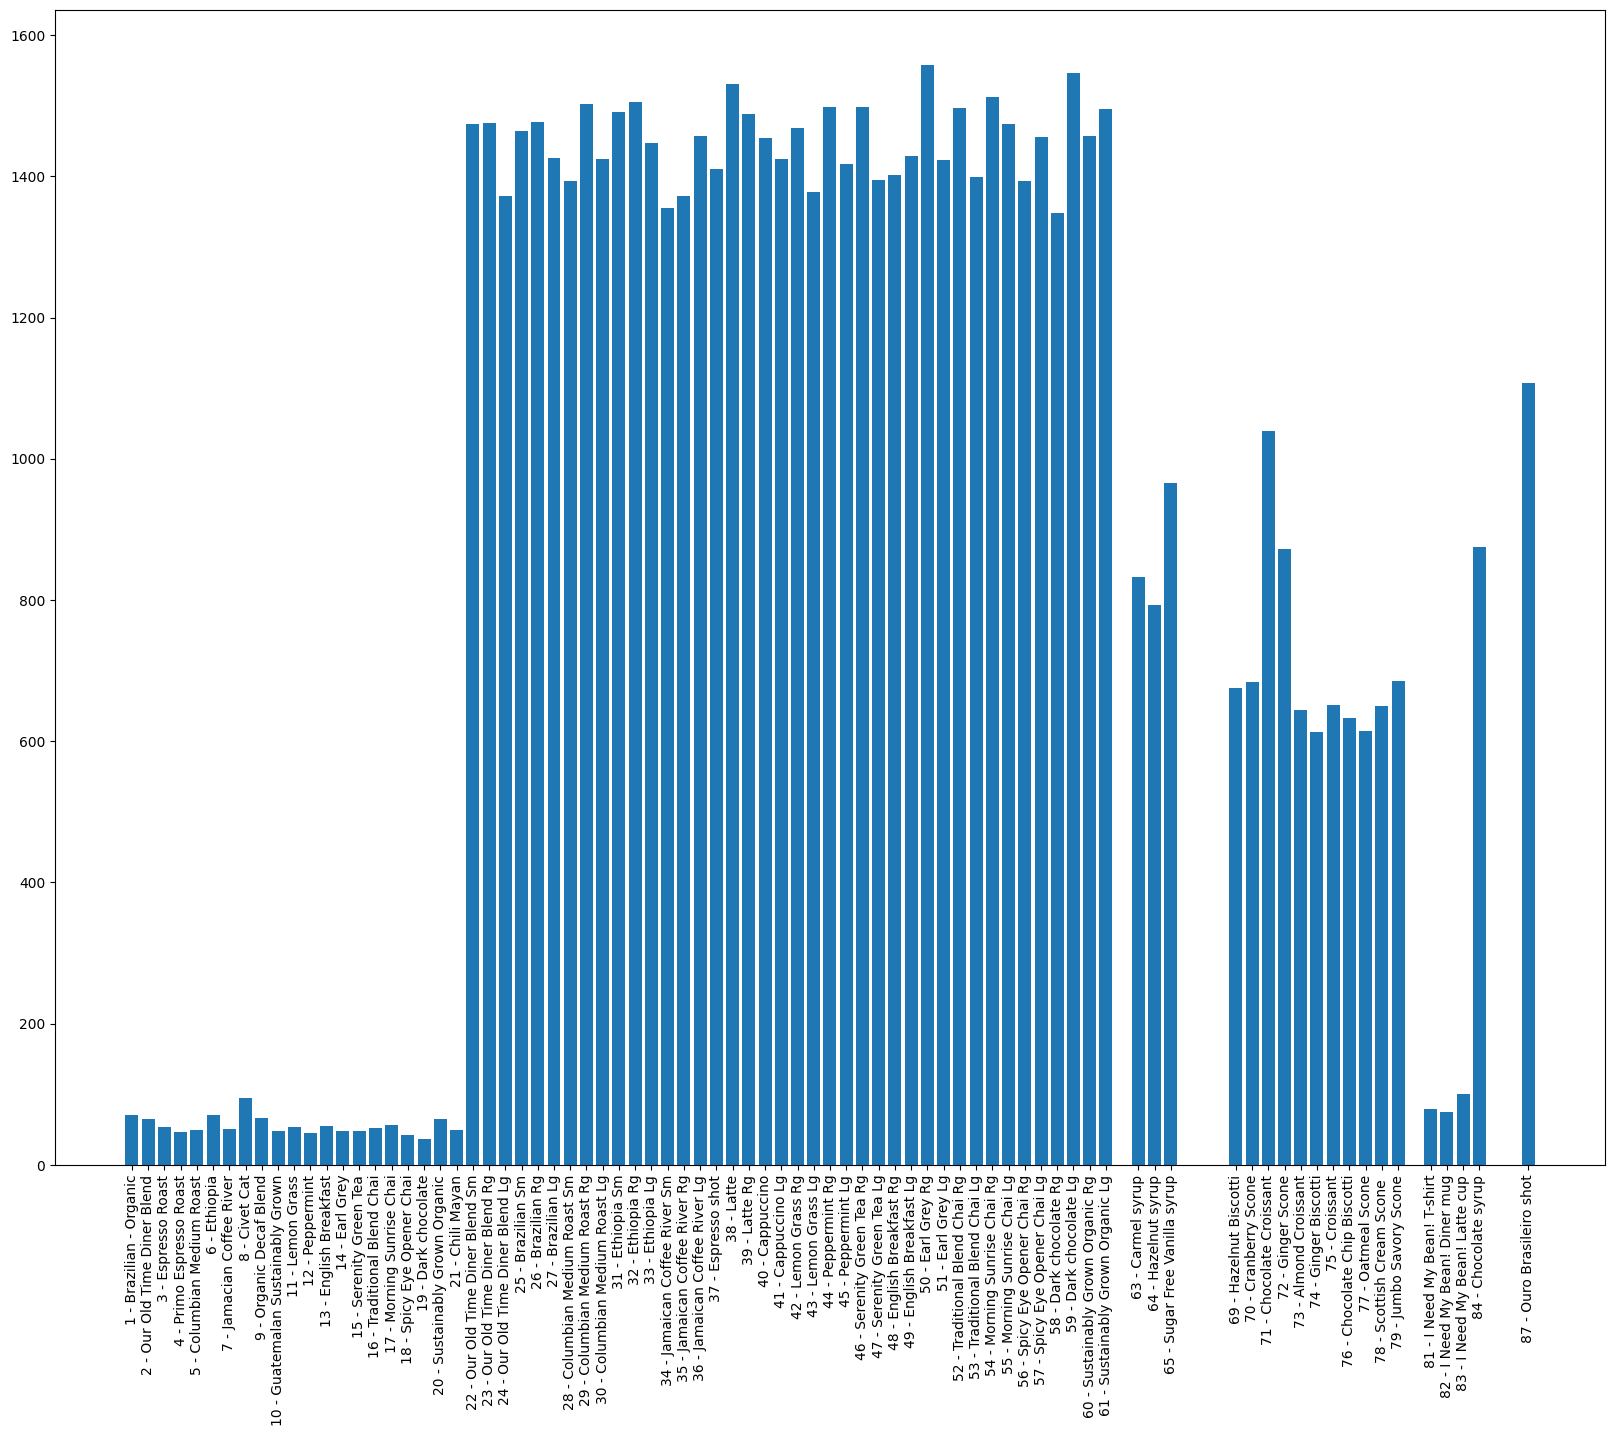

In [4]:
bar_x_labels = []; # Labels for X axis
for id, product in zip(product_sales['product_id'], product_sales['product']):
    bar_x_labels.append(f"{id} - {product}")

fig, ax = plt.subplots(figsize=(20, 15))
plt.bar(product_sales['product_id'], product_sales['quantity'])
plt.xticks(product_sales['product_id'], bar_x_labels, rotation=90)

([<matplotlib.axis.XTick at 0x7f9adfbf3690>,
 [Text(0, 0, 'Coffee beans'),
  Text(1, 0, 'Coffee beans'),
  Text(2, 0, 'Coffee beans'),
  Text(3, 0, 'Coffee beans'),
  Text(4, 0, 'Coffee beans'),
  Text(5, 0, 'Coffee beans'),
  Text(6, 0, 'Coffee beans'),
  Text(7, 0, 'Coffee beans'),
  Text(8, 0, 'Coffee beans'),
  Text(9, 0, 'Coffee beans'),
  Text(10, 0, 'Loose Tea'),
  Text(11, 0, 'Loose Tea'),
  Text(12, 0, 'Loose Tea'),
  Text(13, 0, 'Loose Tea'),
  Text(14, 0, 'Loose Tea'),
  Text(15, 0, 'Loose Tea'),
  Text(16, 0, 'Loose Tea'),
  Text(17, 0, 'Loose Tea'),
  Text(18, 0, 'Packaged Chocolate'),
  Text(19, 0, 'Packaged Chocolate'),
  Text(20, 0, 'Packaged Chocolate'),
  Text(21, 0, 'Coffee'),
  Text(22, 0, 'Coffee'),
  Text(23, 0, 'Coffee'),
  Text(24, 0, 'Coffee'),
  Text(25, 0, 'Coffee'),
  Text(26, 0, 'Coffee'),
  Text(27, 0, 'Coffee'),
  Text(28, 0, 'Coffee'),
  Text(29, 0, 'Coffee'),
  Text(30, 0, 'Coffee'),
  Text(31, 0, 'Coffee'),
  Text(32, 0, 'Coffee'),
  Text(33, 0, 'Coffe

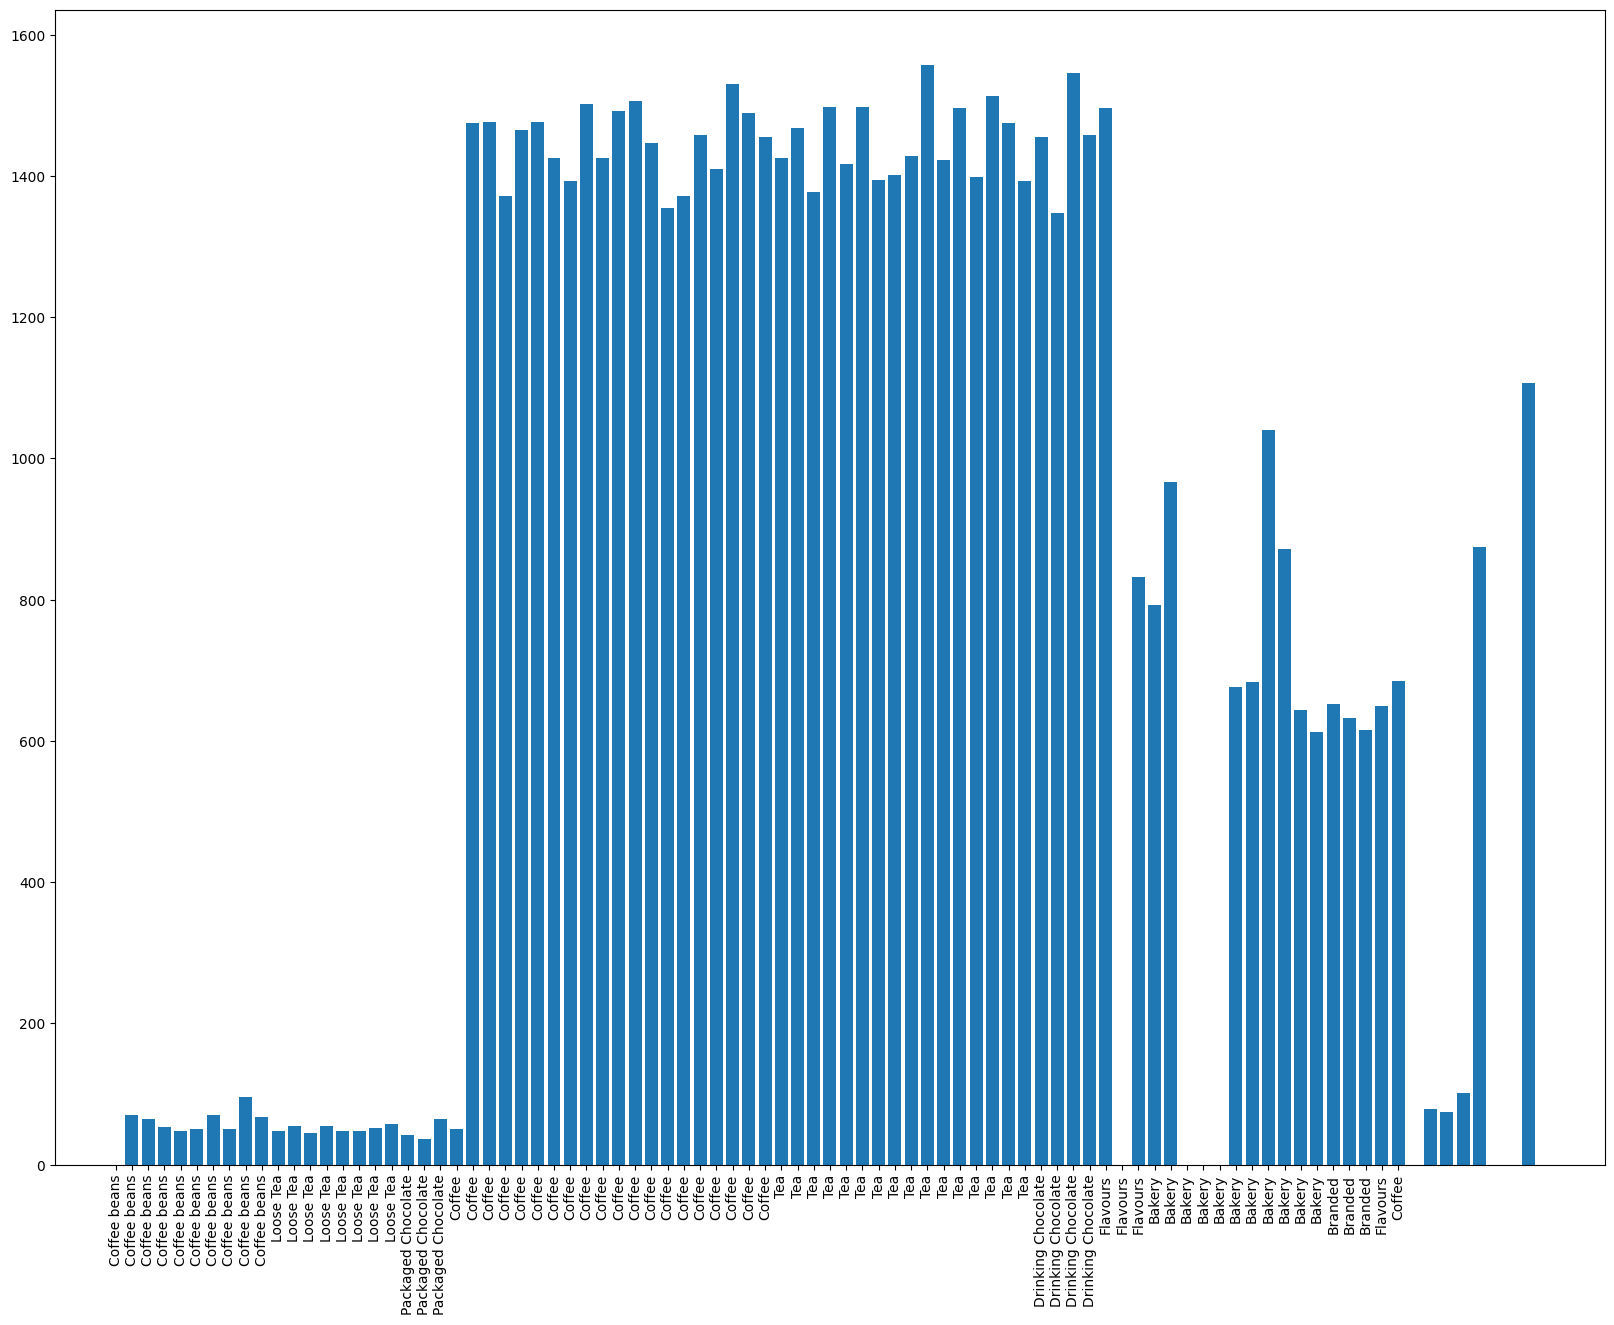

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.bar(product_sales['product_id'], product_sales['quantity'])
plt.xticks(np.arange(len(product_sales)), product_sales['product_category'], rotation=90)